Αρχικοποίηση


In [20]:
import matplotlib as mpl
import sys
import pandas as pd
import random
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*Διάβασμα αρχείου Netflix*

In [21]:
netflix=pd.read_csv('/content/gdrive/MyDrive/DataMining/Project1/data_sample/netflix_titles.csv')
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


*Διάβασμα αρχείου IMDB Movies*

In [22]:
imdb_movies=pd.read_csv('/content/gdrive/MyDrive/DataMining/Project1/data_sample/imdb_movies.csv',low_memory=False)
imdb_movies.head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


*Διάβασμα αρχείου IMDB Ratings*

In [23]:
imdb_ratings=pd.read_csv('/content/gdrive/MyDrive/DataMining/Project1/data_sample/imdb_movies.csv',low_memory=False)
imdb_ratings.head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


**Ερώτημα 1:**
*Ποιό είδος υπερτερεί, οι ταινίες ή οι σειρές ;*


In [24]:
num_movies=netflix.loc[netflix['type']=='Movie'].count().max()
num_shows=netflix.loc[netflix['type']=='TV Show'].count().max()
if num_movies>num_shows:
    print('Υπερτερούν οι ταινίες με αριθμό:', num_movies)
else:
    print('Υπερτερούν οι σειρές με αριθμό', num_show)

Υπερτερούν οι ταινίες με αριθμό: 5377


**Ερώτημα 2:**
*Τα τελευταία χρόνια το netflix επενδύει περισσότερο σε ταινίες ή σε σειρές;*

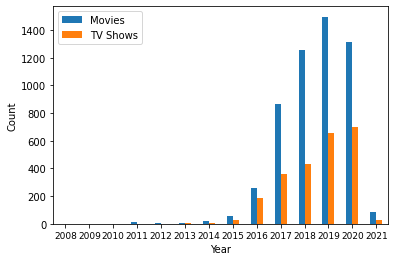

In [29]:
tempDF = netflix.dropna(axis=0, subset=['date_added'])
for x, y in tempDF.iterrows():
    date = str(y['date_added'])
    year = date.split(", ")
    tempDF.at[x, 'date_added'] = year[-1]

dates = tempDF.groupby('date_added')
latest = dates['type'].value_counts()
LY = {}
for x, y in latest.iteritems():
    if x[0] not in LY:
        LY[x[0]] = []
    LY[x[0]].append(y)
  
df1 = pd.DataFrame.from_dict(LY, orient='index', columns=['Movies', 'TV Shows']).fillna(0).astype({'Movies': int, 'TV Shows': int})
df1.plot.bar(rot=0)
mpl.pyplot.ylabel('Count')
mpl.pyplot.xlabel('Year')
mpl.pyplot.tick_params(axis='x', which='major', labelsize=9)

**Ερώτημα 3:**
*Ποιά χώρα έχει το περισσότερο περιεχόμενο;*

In [53]:
temp = netflix.dropna(axis=0, subset=['country'])

def split_df_rows(temp_df, column):
    row_accumulator = []
    def split_list_to_rows(row):
        split_row = str(row[column]).split(", ")
        if isinstance(split_row, list):
            for s in split_row:
                new_row = row.to_dict()
                new_row[column] = str(s)
                row_accumulator.append(new_row)
        else:
            new_row = row.to_dict()
            new_row[column] = str(split_row)
            row_accumulator.append(new_row)

    temp_df.apply(split_list_to_rows, axis=1)
    new_df = pd.DataFrame(row_accumulator)
    return new_df

temp = split_df_rows(temp, 'country')
top_country=temp['country'].value_counts().index[0]
top_value=temp['country'].value_counts()[0]
print("Η χώρα με το περισσότερο περιεχόμενο είναι:",top_country,"με",top_value, "παραγωγές")

Η χώρα με το περισσότερο περιεχόμενο είναι: United States με 3296 παραγωγές


**Ερώτημα 4:**
*Τι είδους περιεχόμενο έχει κάθε χώρα;*

In [126]:
genre_netflix=netflix.dropna(axis=0, subset=['country', 'listed_in'])
genre_netflix=split_df_rows(genre_netflix, 'listed_in')
genre_netflix=split_df_rows(genre_netflix, 'country')
countries_genres=genre_netflix.groupby('country')
genres = countries_genres['listed_in'].unique()
countryList = genres.index
genreDict = {}

for x in range(len(countryList)):
    if countryList[x] not in genreDict:
        genreDict[countryList[x]] = []
    for i in range(len(genres[x])):
        genreDict[countryList[x]].append(genres[x][i])

for x, y in genreDict.items():
    print("Η χώρα: ",x)
    print("Έχει περιεχόμενο: ",",".join(y),"\n")

Η χώρα:  Afghanistan
Έχει περιεχόμενο:  Documentaries,International Movies 

Η χώρα:  Albania
Έχει περιεχόμενο:  Dramas,International Movies 

Η χώρα:  Algeria
Έχει περιεχόμενο:  Classic Movies,Dramas,International Movies 

Η χώρα:  Angola
Έχει περιεχόμενο:  Action & Adventure,International Movies 

Η χώρα:  Argentina
Έχει περιεχόμενο:  Action & Adventure,Comedies,International Movies,Documentaries,Sports Movies,Dramas,Thrillers,Stand-Up Comedy,International TV Shows,Spanish-Language TV Shows,TV Comedies,Crime TV Shows,Independent Movies,Romantic Movies,Docuseries,Movies,Kids' TV,Horror Movies,TV Dramas,Cult Movies,Teen TV Shows,Children & Family Movies,Music & Musicals,LGBTQ Movies,Romantic TV Shows,Reality TV,Classic Movies,Sci-Fi & Fantasy,TV Horror 

Η χώρα:  Armenia
Έχει περιεχόμενο:  Documentaries,International Movies 

Η χώρα:  Australia
Έχει περιεχόμενο:  Docuseries,International TV Shows,Science & Nature TV,Children & Family Movies,Dramas,Sports Movies,Independent Movies,Inter

**Ερώτημα 5:**
*Ετοιμάστε γραφήματα που δειχνουν τους ηθοποιούς με τις περισσότερες ταινίες σε
κάθε χώρα. Κάντε το ίδιο και για τις σειρές*

In [127]:
# Για τις ταινίες    